In [2]:
import numpy as np
import pandas as pd

In [4]:
mush =pd.read_csv("C:\\Users\\HP\\Desktop\\DT\\dataset\\mushrooms.csv")

In [6]:
mush.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [13]:
mush.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [14]:
labelencoder=LabelEncoder()
for column in mush.columns:
    mush[column] = labelencoder.fit_transform(mush[column])

In [15]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [16]:
mush=mush.drop(["veil-type"],axis=1)

In [17]:
#look at the characteristics of the data

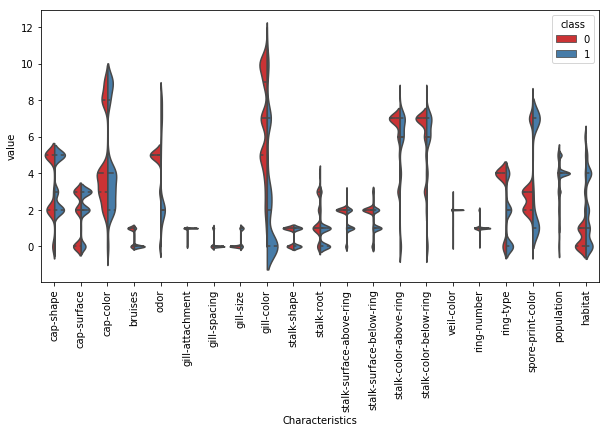

In [19]:
df_div = pd.melt(mush, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = mush.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

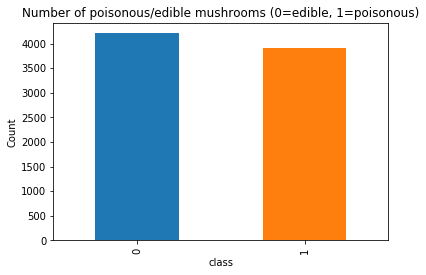

In [20]:
plt.figure()
pd.Series(mush['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

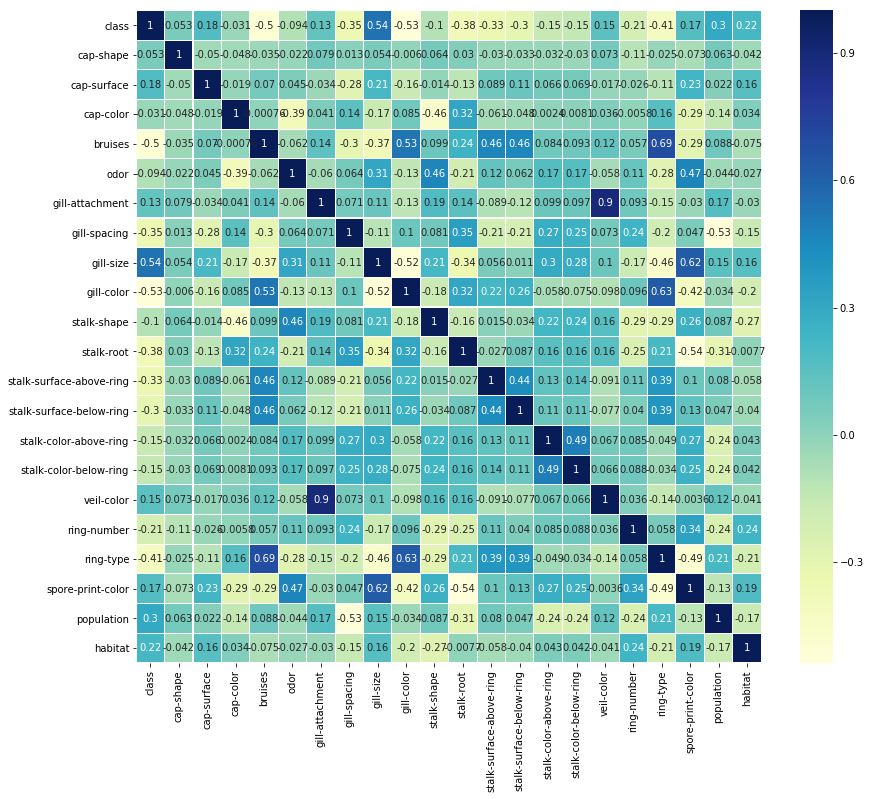

In [22]:
#correlation between the variables
plt.figure(figsize=(14,12))
sns.heatmap(mush.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [23]:
mush[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


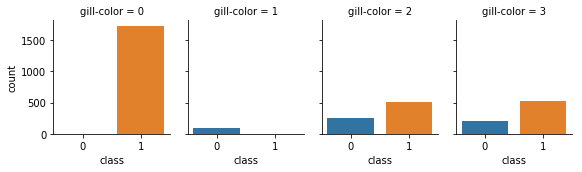

In [24]:
new_var=mush[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

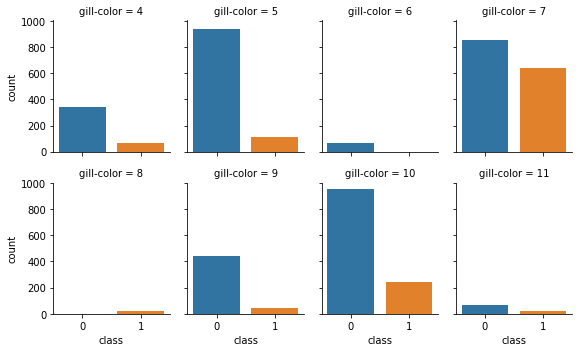

In [25]:
new_var=mush[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

In [27]:
X=mush.drop(['class'], axis=1)
Y=mush['class']

In [28]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)

In [29]:
# Decision tree classifier

In [30]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [31]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

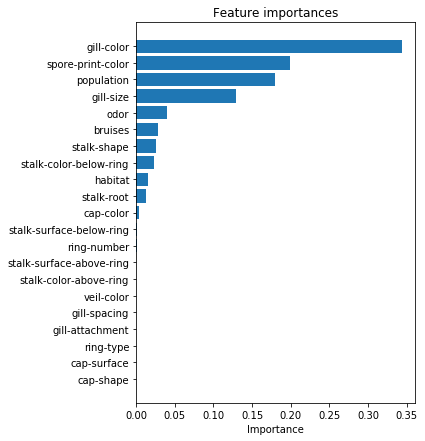

In [32]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [33]:
y_pred=clf.predict(X_test)

In [34]:
print("Decision Tree Classifier report \n", classification_report(Y_test, y_pred))

Decision Tree Classifier report 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       434
          1       1.00      1.00      1.00       379

avg / total       1.00      1.00      1.00       813



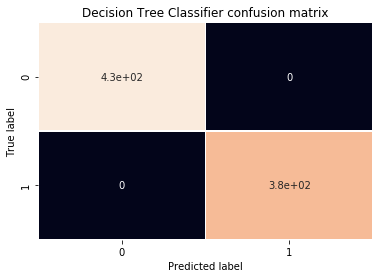

In [35]:
cfm=confusion_matrix(Y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

C:\Users\HP\Anacondanew\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(0, 20)

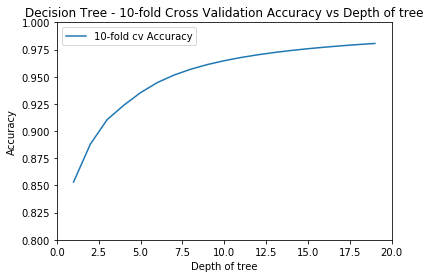

In [36]:
from sklearn.cross_validation import KFold
def computeCVAccuracy(X,y,folds):
    accuracy=[]
    foldAcc=[]
    depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    for i in depth: 
        kf = KFold(len(X),n_folds=folds)
        for train_index, test_index in kf:
            X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)
            clf = DecisionTreeClassifier(max_depth = i).fit(X_train, Y_train)
            score=clf.score(X_test, Y_test)
            accuracy.append(score)     
        foldAcc.append(np.mean(accuracy))  
    return(foldAcc)
cvAccuracy=computeCVAccuracy(X,Y,folds=10)

df1=pd.DataFrame(cvAccuracy)
df1.columns=['10-fold cv Accuracy']
df=df1.reindex(range(1,20))
df.plot()
plt.title("Decision Tree - 10-fold Cross Validation Accuracy vs Depth of tree")
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
plt.ylim([0.8,1])
plt.xlim([0,20])

In [37]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, Y_train)

In [38]:
y_pred_GNB=clf_GNB.predict(X_test)

In [39]:
cfm=confusion_matrix(Y_test, y_pred_GNB)

Text(0.5,15,'Predicted label')

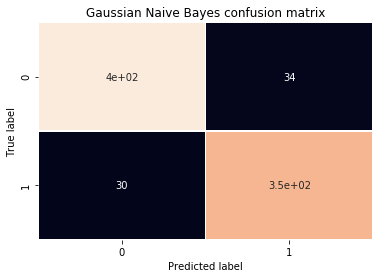

In [40]:
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Gaussian Naive Bayes confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [41]:
print("Test data- Gaussian Naive Bayes report \n", classification_report(Y_test, y_pred_GNB))

Test data- Gaussian Naive Bayes report 
              precision    recall  f1-score   support

          0       0.93      0.92      0.93       434
          1       0.91      0.92      0.92       379

avg / total       0.92      0.92      0.92       813



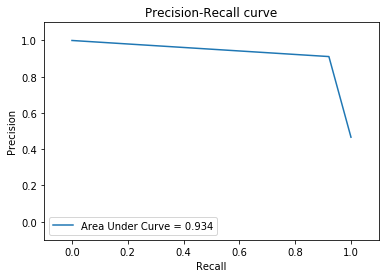

In [42]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_GNB)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.show()

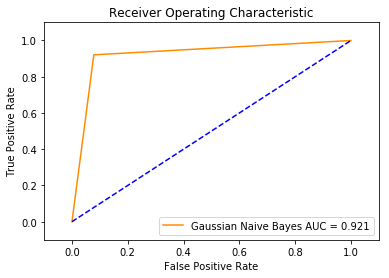

In [43]:
def roc_curve_acc(Y_test, Y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(Y_test, y_pred_GNB, "Gaussian Naive Bayes")